### Our project talks about:<H1><FONT COLOR=#990000>The connection between alcohol consumption, family  and social life to score in mathematics </FONT></H1> 

## שמות המגישים
+ עומר זיו
+ נועם בארנס 
+ אביה חדאד 


In [1]:

from sklearn import tree
from IPython.core.display import HTML
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.core.display import Image
from IPython.core.display import Image

In [2]:
Image(url= "https://images.doctors.co.il/doctors/articles/70027078/di_49981.jpg", width=800, height=600)

In [3]:
url="https://raw.githubusercontent.com/aviahaddad/avia_haddad/main/student_mat.csv"
df = pd.read_csv(url) 

In [4]:
df.head(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.tail(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup       bool
famsup          bool
paid            bool
activities      bool
nursery         bool
higher          bool
internet        bool
romantic        bool
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
dtype: object

**בדיקת ערכים חסרים** 

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

**סכימת גלאי התלמידים בדאטה** 

In [8]:
age = df[["age"]]
age.value_counts() 


age
16     104
17      98
15      82
18      82
19      24
20       3
21       1
22       1
dtype: int64

**נרמול העמודות המבוקשות על פי ציוני התקופה האחרונה של התלמידים על מנת שיהיה יחס מותאם בין הנתונים וכך המסקנות יהיו ריאליות** 

In [22]:
 df['fedu'] = df['fedu']*5
df['medu'] = df['medu']*5
df["dalc"] = df["dalc"]*4
df['studytime'] = df['studytime']*5
df['walc'] = df['walc']*4
df['famrel'] = df['famrel']*4
df['health']=df['health']*4
df['goout']=df['goout']*4

**במהלך כל הפרויקט בחרנו לעבוד עם הציון הסופי ,  כפי שניתן לראות הקורלציה בין הציון בשתי המחציות לציון הסופי גבוה מאוד** 

<AxesSubplot:title={'center':'Correlation'}>

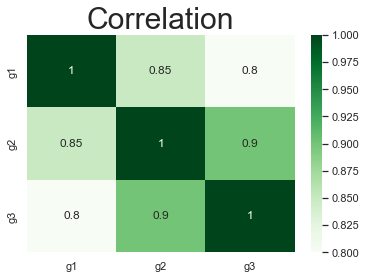

In [23]:
features = ["g1","g2","g3" ] 
correlation_matrix = df[features].corr().round(2)
plt.title("Correlation",fontsize=30)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

### .ראשית, נבחן עד כמה באמת צריכת האלכוהול משפיעה על הציון במתמטיקה 

<AxesSubplot:xlabel='g3'>

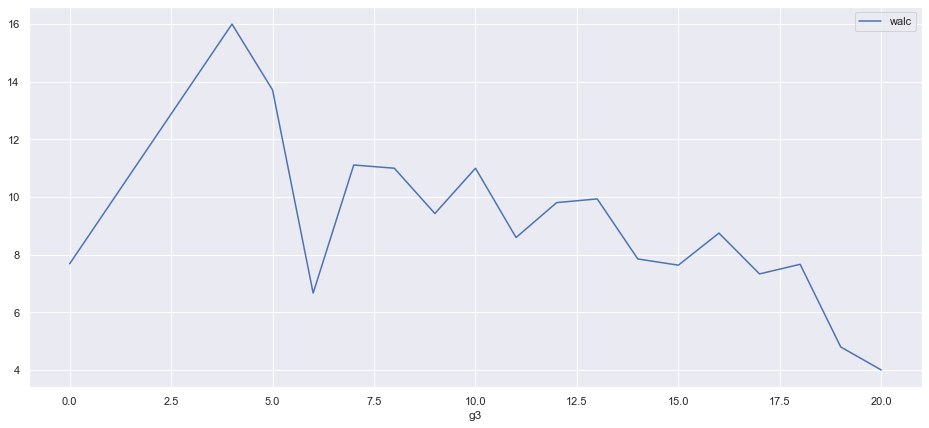

In [24]:

pd.pivot_table(
    df,index = ['walc'], values = ['g3']
).sort_values(by=['g3'], ascending=False
).plot(figsize=(16,7))

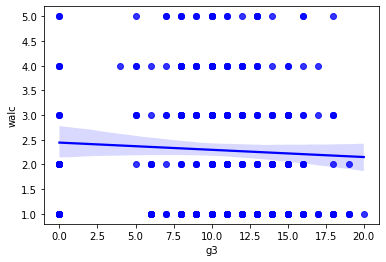

In [12]:
sns.regplot(x = 'g3', y = 'walc',color="b",data=df);

**כעת נרצה לבדוק עד כמה זמני הלמידה השבועיים נפגעים בעקבות צריכת אלכוהול**

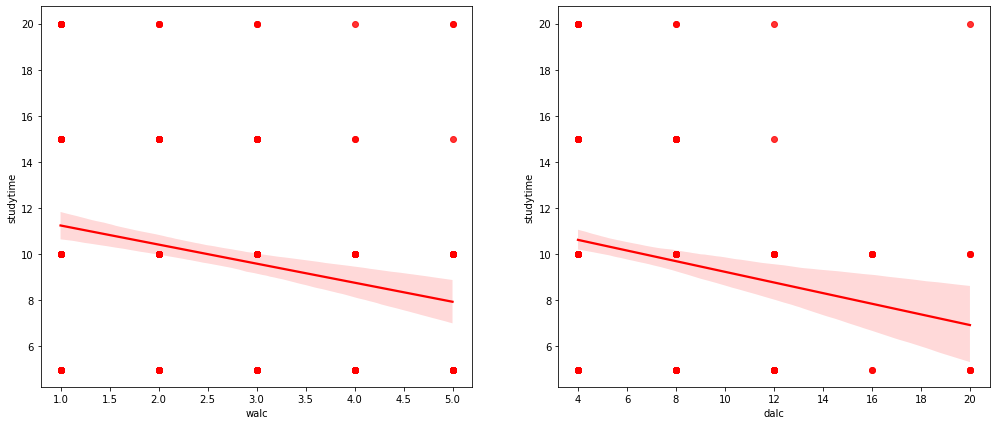

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(17,7))
sns.regplot(x = 'walc', y = 'studytime',data=df,color="r", ax = ax1);
sns.regplot(x = 'dalc', y = 'studytime',data=df,color="r",ax = ax2);


### תובנה 1: ניתן להגיע להבנה כי שתיית אלכוהול משפיעה לרעה על זמני הלימוד במתמטיקה במהלך השבוע. יחד עם זאת, הציונים לא הושפעו בצורה דרסטית עקב שתיית האלכוהול.  

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

### כעת אנו רוצים לבחון את השפעת השכלת ההורים על ציוני ילדיהם 


  השכלה של האם - (מספריים: 0 - אין 5 - חינוך יסודי (כיתה ד '), 10 - כיתה ט' עד ט ', 15 - השכלה תיכונית או 20 - השכלה גבוהה )

 השכלה של אבא - (מספרי: 0 - אין, 5 - חינוך יסודי (כיתה ד '), 10 - כיתה ט' עד ט ', 15 - השכלה תיכונית או 20 - השכלה גבוהה)

**רמת ההשכלה של ההורים** 

c:\users\mikha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\mikha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


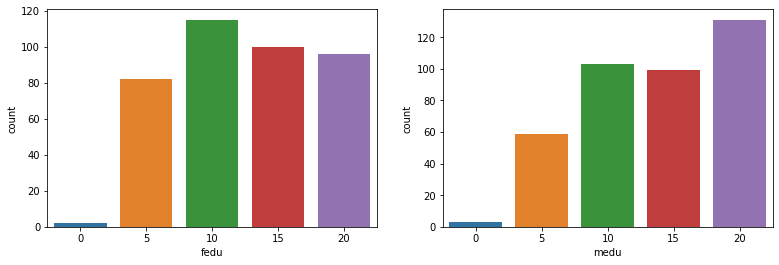

In [14]:
fig, ax =plt.subplots(1,2,figsize=(13,4))
sns.countplot(df['fedu'], ax=ax[0])
sns.countplot(df['medu'], ax=ax[1])
plt.show()

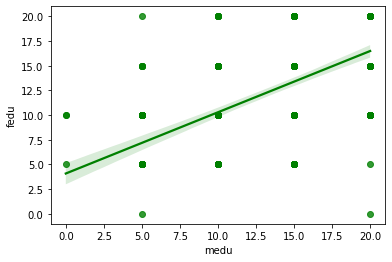

In [15]:
sns.regplot(x='medu', y='fedu',color="g", data=df);

**ניתן להבחין כי ככל שהורה אחד בעל השכלה גבוה יותר כך גם ההורה השני** 

**הקשר בין ציון סוף שנת  של התלמידים לבין ההשכלה של הוריהם:**

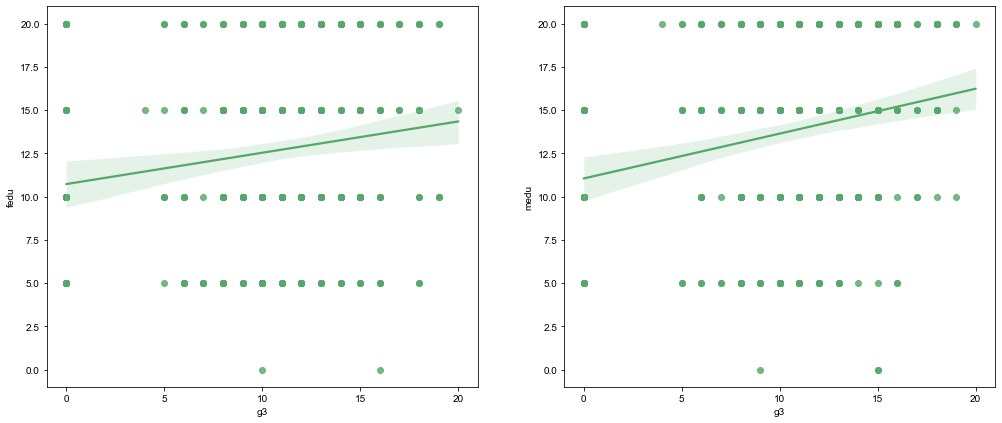

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(17,7))
sns.set(font_scale=1.9)
sns.regplot(x='g3', y='fedu',color="g", data=df, ax = ax1);
sns.regplot(x='g3', y='medu',color="g", data=df,ax = ax2);


#### נתוני הגרפים המוצגים הובילו אותנו לחקור לעומק ולבחון האם סוג המקצוע של ההורים משפיע גם כן על איכות הציון   

<AxesSubplot:title={'center':'The occupations of the fathers'}, xlabel='fjob', ylabel='g3'>

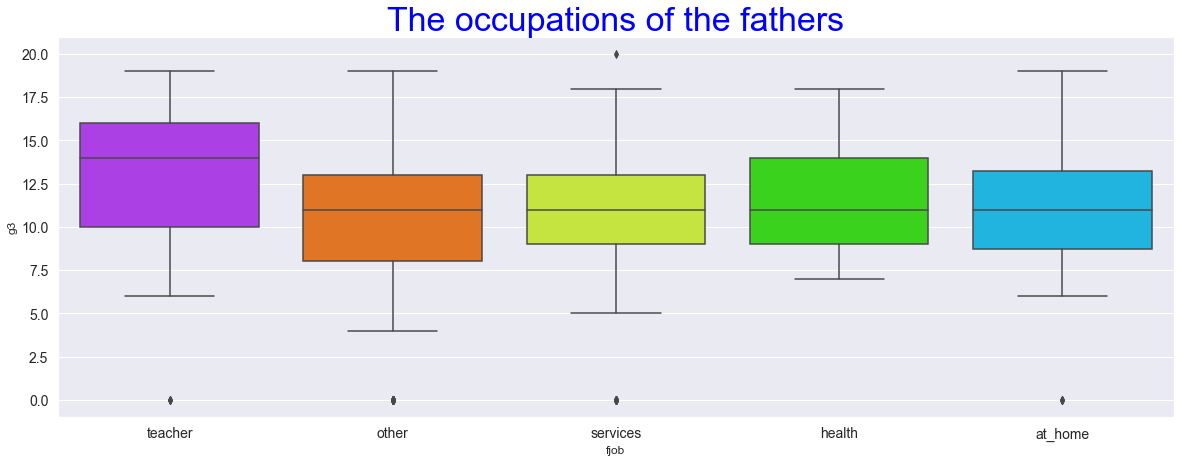

In [17]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title('The occupations of the fathers',color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(y='g3',x='fjob',data=df,palette='gist_ncar_r')

<AxesSubplot:title={'center':'The occupations of mothers'}, xlabel='mjob', ylabel='g3'>

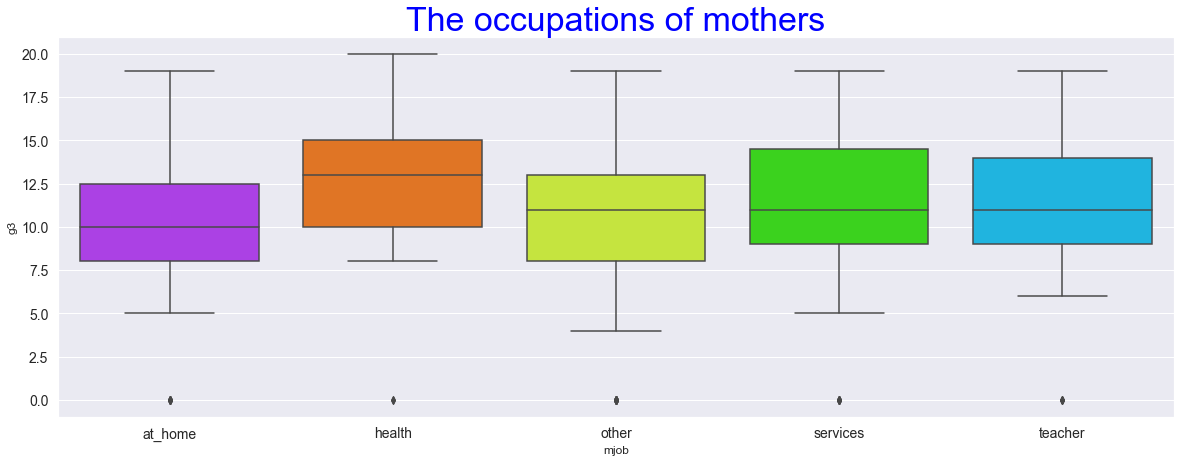

In [18]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title('The occupations of mothers',color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(y='g3',x='mjob',data=df,palette='gist_ncar_r')

**מעניין לראות כי בבתים בהם האב עוסק בהוראה או האם עוסקת במקצועות הבריאות, הציונים של ילדיהם גבוהים יותר**

###     תובנה 2 :  ככל שההורים בעלי השכלה גבוה יותר כך ציוני ילידהם גבוה בהתאמה ובנוסף, קיים  הבדל בין מקצועות האב והאם המשפיעים על ציוני ילדיהם

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

### נושא נוסף אותו אנו רוצים לבחון הוא כיצד מערכת היחסים עם המשפחה וחיי החברה משפיעים על ציוני התלמידים 


#### ראשית , נבחן את איכות מערכת היחסים המשפחתית של התלמידים אל מול ההשפעה על הציונים שלהם

<AxesSubplot:xlabel='g3'>

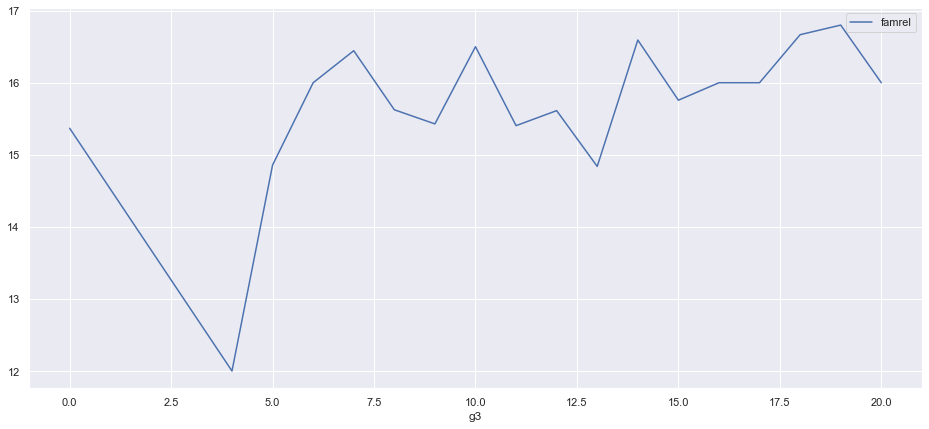

In [19]:
pd.pivot_table(
    df,index = ['g3'], values = ['famrel']
).sort_values(by=['g3'], ascending=False
).plot(figsize=(16,7))

**ניתן להבחין כי תלמידים בעלי ציון גבוה הם בעלי איכות זמן משפחתי גבוה, ואילו תלמידים בעלי ציון בינוני זמן איכות המשפחתי שלהם מגוון יותר**

#### בילויים אחרי זמן הלימודים אל מול הציון הסופי

<AxesSubplot:xlabel='g3'>

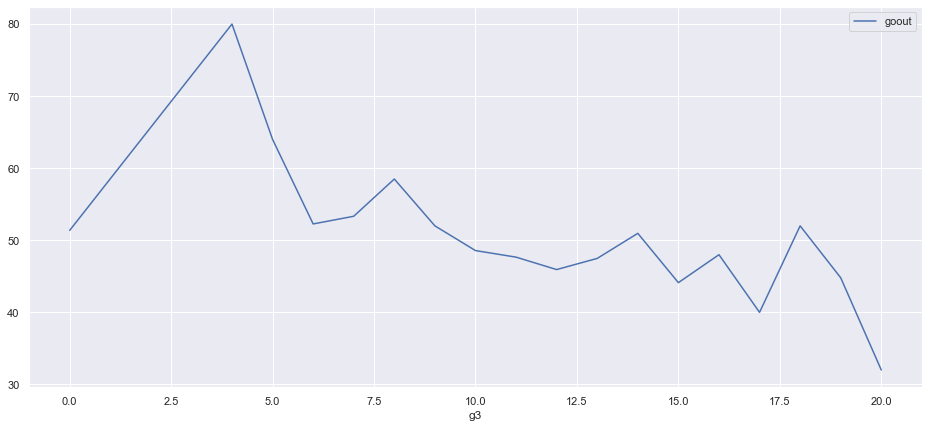

In [29]:
pd.pivot_table(
    df,index = ['g3'], values = ['goout']
).sort_values(by=['g3'], ascending=False
).plot(figsize=(16,7))

<AxesSubplot:title={'center':'Romantic relationship'}, xlabel='romantic', ylabel='g3'>

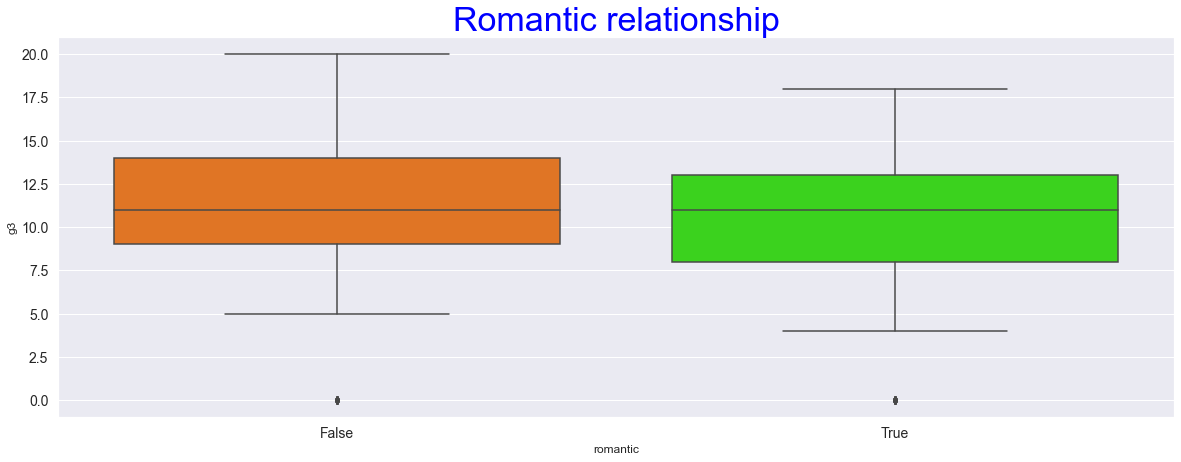

In [21]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title("Romantic relationship",color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(y='g3',x='romantic',data=df,palette='gist_ncar_r')

**ניתן לראות כי אין השפעה יתרה על הציון כאשר התלמידים היו במערכת יחסים רומנטית במהלך שנת הלימודים**

###  תובנה 3: מהגרפים ניתן להבין כי חיי החברה והבילויים מחוץ לשעות הלימודים אינם פוגעים באיכות הציון אצל התלמידים. יחד עם זאת קשר טוב עם המשפחה יכול להועיל לציון גבוה יותר

##

##










##  סיכום התובנות: קיים קשר בין ציוני התלמידים במתמטיקה לבין משפחתם בדגש על רמת ההשכלה של הוריהם וזמן איכות המשפחתי. לעומת זאת לא ניתן להבחין בקשר ישיר בין צריכת אלכוהול לציוני התלמידים אך כן לזמן למידתם  

##

#### **Belief in yourself, perseverance and love are parameters for success**